In [13]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import tqdm

In [41]:
def SimulateTrajectory(f:"Admixture rate", s:"force", n:"population", g:"Generations", Tn:"Time neutral", output_tr=False):
    na = n * f
    nA = n * ( 1 - f )

    result = [f]
    fix_freq = None

    for gen in range(0,g+1) :

    ### total fitness for each genotype
        if gen < Tn:
            na_fitness = na
            nA_fitness = nA
        else:
            na_fitness = na * ( 1 + s )
            nA_fitness = nA

        draw_p = float( na_fitness ) / float( na_fitness + nA_fitness )
        if draw_p == 0.0 or draw_p == 1.0:
            fix_freq = draw_p
            break

        new_na = np.random.binomial(n,draw_p)

        result.append(float(new_na)/float(n))

        na = new_na
        nA = n - na
    while len(result) < g+1:
        result.append(fix_freq)
    if output_tr:
        print( "TR\t" + "\t".join(result) )
    return result

def compose(*args):
    ans = ""
    for arg in args:
        ans += str(arg)
        ans += " "
    return ans

def SimLaunch(traj = 10000, transp = 0.01, adm = 0.0005, force = 0.02, pop = 10000, generations = 1000, neutral_time = 300, plot = True):
    if neutral_time < 1:
        neutral_time = int(generations * neutral_time)
    trajectories = []
    for i in range(traj): #np.random.randint(1,100)
        current_tr = SimulateTrajectory(adm, force, pop, generations, neutral_time)
        trajectories.append(current_tr)
        if plot:
            plt.plot(current_tr, color = (1,0,0,transp))
    if plot:
        plt.title(compose(traj, "trajectories,", adm, "admixture,", force, "force,", pop, "population ", neutral_time, "neutral time"))
        plt.ylim([-0.01, 1.01])
        plt.show()
    return trajectories

def is_zero(mas):
    return not (np.mean(mas[-10:]) > 0.001)

def SimZeroPercentage(return_traj = False, **kwargs):
    traj = SimLaunch(**kwargs, plot= False)
    ans = [is_zero(e) for e in traj]
    return sum(ans)/len(ans)

In [40]:
a = SimLaunch(traj = 1000, transp = 0.01, adm = 0.01, force = 0.02, pop = 10000, generations = 1000, neutral_time = 0, plot = False)
s = [is_zero(e) for e in a]
print(sum(s)/len(s))

SimZeroPercentage(traj = 1000, transp = 0.01, adm = 0.01, force = 0.02, pop = 10000, generations = 1000, neutral_time = 0)

0.026


0.019

# Популяция в 1000 - очень плохо, очень много уходит в 0 даже без нейтральности

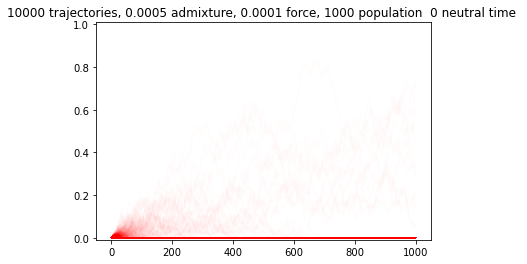

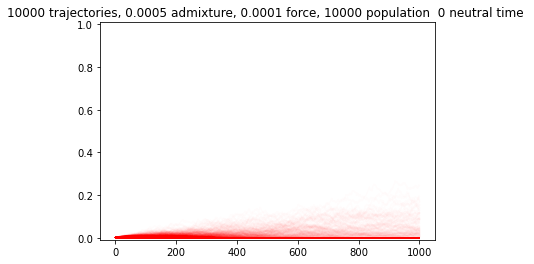

In [3]:
#compare different population sizes
SimLaunch(pop = 1000, neutral_time = 0)
SimLaunch(pop = 10000, neutral_time = 0)

# Разный admixture

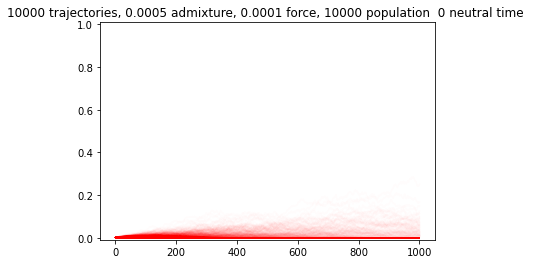

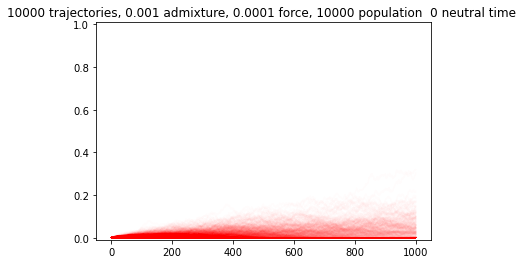

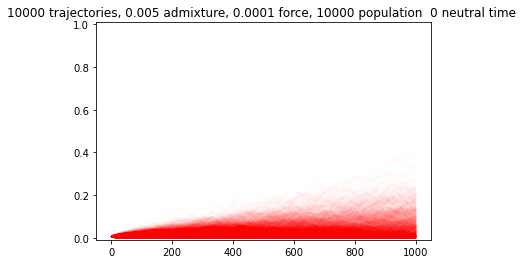

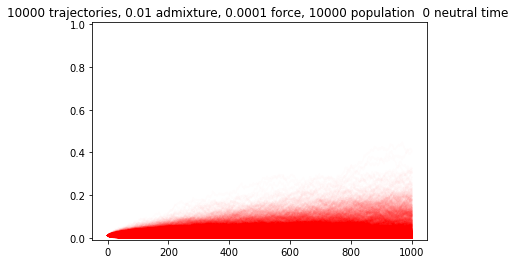

In [4]:
#compare different admixture rate on good pop size
SimLaunch(adm = 0.0005, neutral_time = 0)
SimLaunch(adm = 0.001, neutral_time = 0)
SimLaunch(adm = 0.005, neutral_time = 0)
SimLaunch(adm = 0.01, neutral_time = 0)

# разное время нейтральности на малом adm

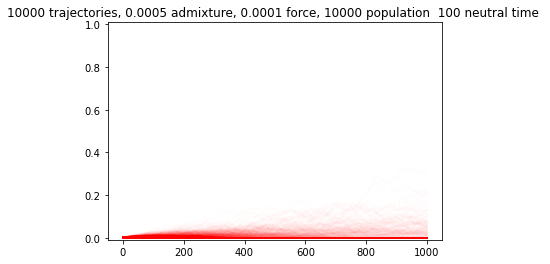

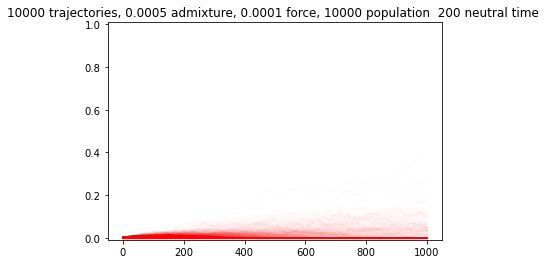

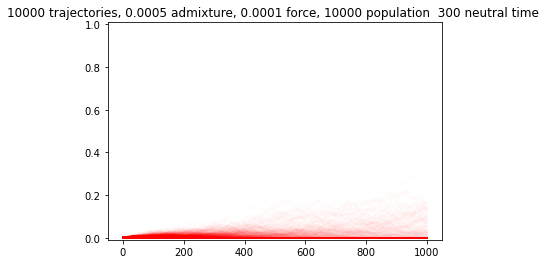

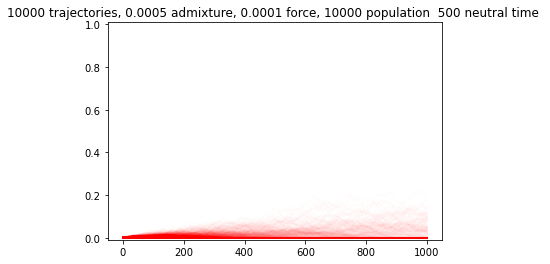

In [7]:
#compare different neutrality times on small adm rate

SimLaunch(adm = 0.0005, neutral_time = 0.1)
SimLaunch(adm = 0.0005, neutral_time = 0.2)
SimLaunch(adm = 0.0005, neutral_time = 0.3)
SimLaunch(adm = 0.0005, neutral_time = 0.5)

# разное время нейтральности на среднем adm

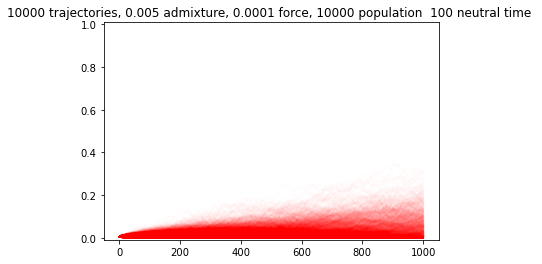

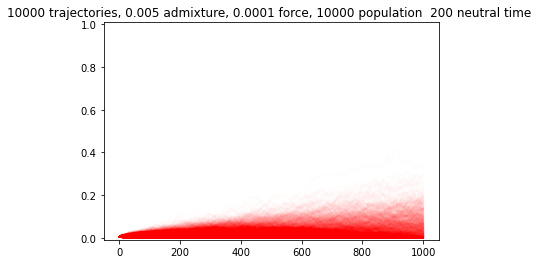

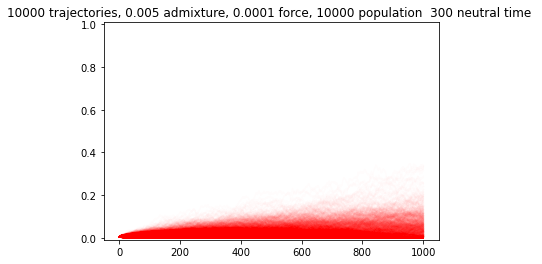

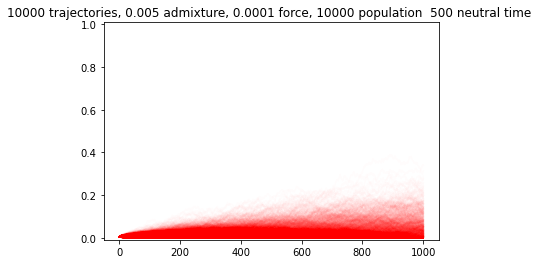

In [5]:
#compare different neutrality times on medium adm rate

SimLaunch(adm = 0.005, neutral_time = 0.1)
SimLaunch(adm = 0.005, neutral_time = 0.2)
SimLaunch(adm = 0.005, neutral_time = 0.3)
SimLaunch(adm = 0.005, neutral_time = 0.5)

# Разное время нейтральности на большом adm

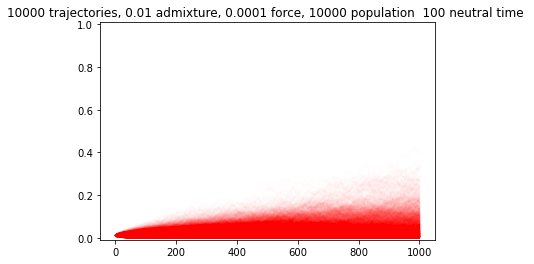

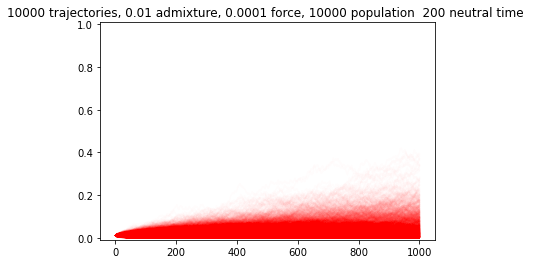

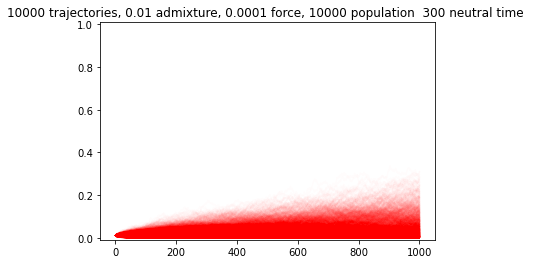

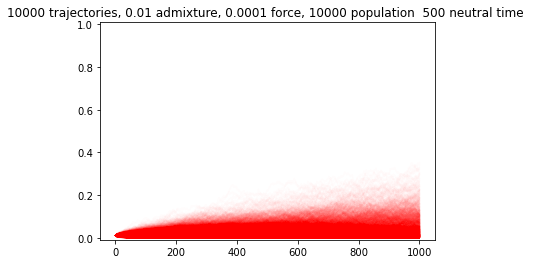

In [6]:
#compare different neutrality times on large adm rate

SimLaunch(adm = 0.01, neutral_time = 0.1)
SimLaunch(adm = 0.01, neutral_time = 0.2)
SimLaunch(adm = 0.01, neutral_time = 0.3)
SimLaunch(adm = 0.01, neutral_time = 0.5)

### В целом, проблема с тем, что до начала действия отбора примесь уйдёт не сильно ощущается на нормальной популяции. (хотя на мелких всё равно очень много вариантов выпадает) На 1000 это может сильно мешать

### Force на это дело не влияет, поэтому его здесь нет. Единственное - нужно его верхнюю границу подбирать так, чтобы не было быстрого выстрела до единицы

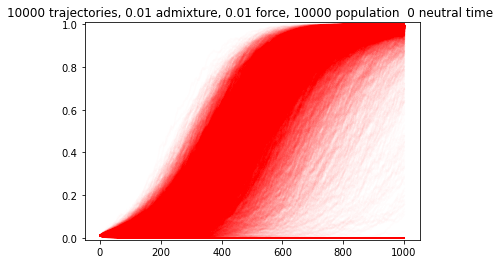

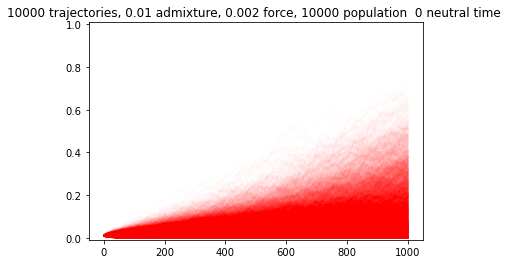

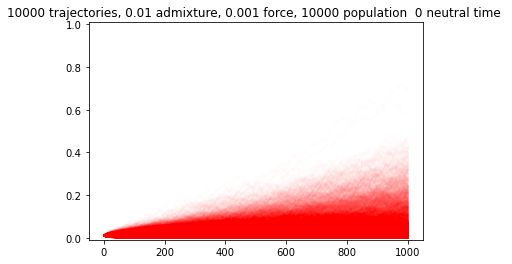

In [12]:
#force rockets up to 1
SimLaunch(adm = 0.01, force = 1e-2,neutral_time=0)
SimLaunch(adm = 0.01, force = 1e-2 / 5,neutral_time=0)
SimLaunch(adm = 0.01, force = 1e-2 / 10,neutral_time=0)

In [52]:
import numpy as np
adm_min, adm_max, adm_quan = 0.005, 0.01, 10
adms = np.logspace(np.log2(adm_min), np.log2(adm_max), base = 2, num = 10)

neutral_min, neutral_max, neutral_quan = 0, 500, 10
neutrs = np.linspace(neutral_min, neutral_max, neutral_quan, dtype = int)

ansmatrix = np.zeros((adm_quan, neutral_quan))

for i, adm in tqdm.tqdm(enumerate(adms)):
    for j, neut in enumerate(neutrs):
        ansmatrix[i][j] = SimZeroPercentage(traj = 1000, adm=adm, neutral_time = neut, force = 0.02)
        #print(SimZeroPercentage(traj = 100, adm=adm, neutral_time = neut, force = 0.02))
        #print(SimZeroPercentage(traj = 100, adm = 0.01, force = 0.02, pop = 10000, generations = 1000, neutral_time = 0))
        print(i,j,ansmatrix[i][j], adm, neut)

0it [00:00, ?it/s]

0 0 0.153 0.005000000000000001 0
0 1 0.404 0.005000000000000001 55
0 2 0.537 0.005000000000000001 111
0 3 0.642 0.005000000000000001 166
0 4 0.682 0.005000000000000001 222
0 5 0.739 0.005000000000000001 277
0 6 0.763 0.005000000000000001 333
0 7 0.798 0.005000000000000001 388
0 8 0.796 0.005000000000000001 444


1it [00:15, 15.39s/it]

0 9 0.842 0.005000000000000001 500
1 0 0.098 0.00540029869446153 0
1 1 0.368 0.00540029869446153 55
1 2 0.509 0.00540029869446153 111
1 3 0.61 0.00540029869446153 166
1 4 0.668 0.00540029869446153 222
1 5 0.7 0.00540029869446153 277
1 6 0.751 0.00540029869446153 333
1 7 0.765 0.00540029869446153 388
1 8 0.812 0.00540029869446153 444


2it [00:29, 14.73s/it]

1 9 0.822 0.00540029869446153 500
2 0 0.105 0.005832645197880584 0
2 1 0.346 0.005832645197880584 55
2 2 0.498 0.005832645197880584 111
2 3 0.574 0.005832645197880584 166
2 4 0.633 0.005832645197880584 222
2 5 0.692 0.005832645197880584 277
2 6 0.743 0.005832645197880584 333
2 7 0.778 0.005832645197880584 388
2 8 0.807 0.005832645197880584 444


3it [00:43, 14.48s/it]

2 9 0.807 0.005832645197880584 500
3 0 0.074 0.006299605249474366 0
3 1 0.306 0.006299605249474366 55
3 2 0.474 0.006299605249474366 111
3 3 0.555 0.006299605249474366 166
3 4 0.634 0.006299605249474366 222
3 5 0.676 0.006299605249474366 277
3 6 0.708 0.006299605249474366 333
3 7 0.737 0.006299605249474366 388
3 8 0.78 0.006299605249474366 444


4it [00:57, 14.27s/it]

3 9 0.797 0.006299605249474366 500
4 0 0.064 0.006803950000871887 0
4 1 0.254 0.006803950000871887 55
4 2 0.38 0.006803950000871887 111
4 3 0.54 0.006803950000871887 166
4 4 0.605 0.006803950000871887 222
4 5 0.636 0.006803950000871887 277
4 6 0.683 0.006803950000871887 333
4 7 0.745 0.006803950000871887 388
4 8 0.759 0.006803950000871887 444


5it [01:10, 13.77s/it]

4 9 0.766 0.006803950000871887 500
5 0 0.055 0.007348672461377995 0
5 1 0.246 0.007348672461377995 55
5 2 0.393 0.007348672461377995 111
5 3 0.496 0.007348672461377995 166
5 4 0.586 0.007348672461377995 222
5 5 0.595 0.007348672461377995 277
5 6 0.659 0.007348672461377995 333
5 7 0.71 0.007348672461377995 388
5 8 0.753 0.007348672461377995 444


6it [01:27, 14.65s/it]

5 9 0.768 0.007348672461377995 500
6 0 0.043 0.007937005259841002 0
6 1 0.215 0.007937005259841002 55
6 2 0.363 0.007937005259841002 111
6 3 0.47 0.007937005259841002 166
6 4 0.574 0.007937005259841002 222
6 5 0.63 0.007937005259841002 277
6 6 0.654 0.007937005259841002 333
6 7 0.661 0.007937005259841002 388
6 8 0.711 0.007937005259841002 444


7it [01:43, 15.21s/it]

6 9 0.745 0.007937005259841002 500
7 0 0.033 0.00857243982853073 0
7 1 0.19 0.00857243982853073 55
7 2 0.352 0.00857243982853073 111
7 3 0.459 0.00857243982853073 166
7 4 0.535 0.00857243982853073 222
7 5 0.584 0.00857243982853073 277
7 6 0.641 0.00857243982853073 333
7 7 0.67 0.00857243982853073 388
7 8 0.699 0.00857243982853073 444


8it [01:59, 15.44s/it]

7 9 0.739 0.00857243982853073 500
8 0 0.017 0.009258747122872904 0
8 1 0.173 0.009258747122872904 55
8 2 0.324 0.009258747122872904 111
8 3 0.428 0.009258747122872904 166
8 4 0.479 0.009258747122872904 222
8 5 0.579 0.009258747122872904 277
8 6 0.62 0.009258747122872904 333
8 7 0.639 0.009258747122872904 388
8 8 0.679 0.009258747122872904 444


9it [02:16, 16.10s/it]

8 9 0.698 0.009258747122872904 500
9 0 0.018 0.010000000000000002 0
9 1 0.147 0.010000000000000002 55
9 2 0.305 0.010000000000000002 111
9 3 0.367 0.010000000000000002 166
9 4 0.468 0.010000000000000002 222
9 5 0.542 0.010000000000000002 277
9 6 0.617 0.010000000000000002 333
9 7 0.619 0.010000000000000002 388
9 8 0.652 0.010000000000000002 444


10it [02:33, 15.35s/it]

9 9 0.682 0.010000000000000002 500


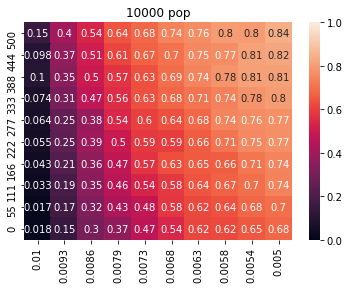

In [56]:
sns.heatmap(ansmatrix, vmin = 0, vmax = 1, xticklabels = np.around(adms, 4)[::-1], yticklabels = neutrs[::-1], annot=True)
plt.title("10000 pop");

In [54]:
ansmatrix_smol = np.zeros((adm_quan, neutral_quan))

for i, adm in tqdm.tqdm(enumerate(adms)):
    for j, neut in enumerate(neutrs):
        ansmatrix_smol[i][j] = SimZeroPercentage(adm=adm, neutral_time = neut, force = 0.02, pop=1000)
        print(i,j,ansmatrix_smol[i][j])

0it [00:00, ?it/s]

0 0 0.8136
0 1 0.9069
0 2 0.9384
0 3 0.9528
0 4 0.9611
0 5 0.9688
0 6 0.973
0 7 0.9761
0 8 0.9805


1it [00:36, 36.82s/it]

0 9 0.9828
1 0 0.8065
1 1 0.9082
1 2 0.9356
1 3 0.9463
1 4 0.9606
1 5 0.9666
1 6 0.9701
1 7 0.9734
1 8 0.9789


2it [01:12, 36.36s/it]

1 9 0.9789
2 0 0.7984
2 1 0.8896
2 2 0.93
2 3 0.9433
2 4 0.9565
2 5 0.9623
2 6 0.9699
2 7 0.9704
2 8 0.9767


3it [01:55, 39.07s/it]

2 9 0.9781
3 0 0.7823
3 1 0.8841
3 2 0.9249
3 3 0.9418
3 4 0.9541
3 5 0.963
3 6 0.9656
3 7 0.9707
3 8 0.9731


4it [02:37, 40.21s/it]

3 9 0.9754
4 0 0.7576
4 1 0.8818
4 2 0.9185
4 3 0.9384
4 4 0.9474
4 5 0.9548
4 6 0.9618
4 7 0.9668
4 8 0.9708


5it [03:19, 40.85s/it]

4 9 0.9734
5 0 0.7515
5 1 0.8652
5 2 0.9132
5 3 0.9333
5 4 0.9476
5 5 0.9498
5 6 0.958
5 7 0.965
5 8 0.9688


6it [04:03, 42.20s/it]

5 9 0.9708
6 0 0.7306
6 1 0.8565
6 2 0.8988
6 3 0.9251
6 4 0.941
6 5 0.9554
6 6 0.9544
6 7 0.9608
6 8 0.9623


7it [04:51, 43.89s/it]

6 9 0.9691
7 0 0.7177
7 1 0.8503
7 2 0.8981
7 3 0.9232
7 4 0.9386
7 5 0.9489
7 6 0.9532
7 7 0.9599
7 8 0.9632


8it [05:37, 44.76s/it]

7 9 0.9671
8 0 0.6885
8 1 0.8381
8 2 0.8897
8 3 0.9159
8 4 0.9323
8 5 0.9387
8 6 0.9515
8 7 0.9601
8 8 0.9623


9it [06:26, 45.94s/it]

8 9 0.9651
9 0 0.6784
9 1 0.82
9 2 0.8857
9 3 0.9091
9 4 0.9251
9 5 0.9358
9 6 0.9456
9 7 0.9538
9 8 0.9548


10it [07:17, 43.70s/it]

9 9 0.9619


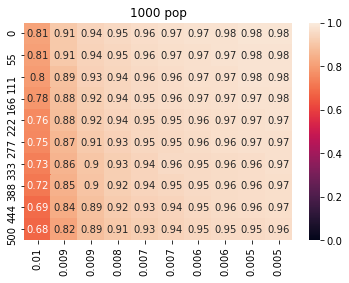

In [55]:
sns.heatmap(ansmatrix_smol, vmin = 0, vmax = 1, xticklabels = np.around(adms, 3)[::-1], yticklabels = neutrs, annot=True)
plt.title("1000 pop");

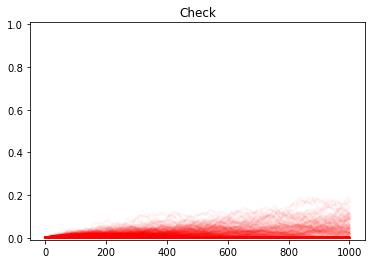

In [4]:
for i in range(1000): #np.random.randint(1,100)
    plt.plot(SimulateTrajectory(0.0005, 1e-4, 10000, 1000, np.random.randint(1,300)), color = (1,0,0,0.05))
plt.title("Check")
plt.ylim([-0.01, 1.01])
plt.show()

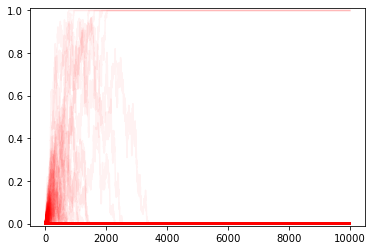

In [65]:
for i in range(10000): #np.random.randint(1,100)
    plt.plot(SimulateTrajectory(0.0005, 1e-4, 1000, 1000, np.random.randint(1,300)), color = (1,0,0,0.05))
plt.ylim([-0.01, 1.01])
plt.show()

In [ ]:
DIR = "D:/bio_inf/lab/Learning-of-natural-selection-using-machine-learning-master/selam/next_gen_simulation_sm/*"

sources = list(range(760))#[0]

files = np.array(glob.glob(DIR))
mask = np.zeros(files.shape[0], dtype = bool)
for i in range(files.shape[0]):
    gen, samp  = files[i].split('\\')[-1].split("_")
    gen, samp = int(gen), int(samp.split('.')[0])
    if samp in sources:
        mask[i] = 1

files_1src = files[mask]
poses = list(range(100))
#2rd number is ours
dat = [[] for i in range(9)]
for file in files_1src:
    for pos in poses:
        s = open(file, "r")
        rd = s.readlines()
        gen, samp  = file.split('\\')[-1].split("_")
        gen, samp = int(gen), int(samp.split('.')[0])
        line = rd[pos]
        num = float(line.split()[2])
        dat[gen//100 - 1].append(num)
    s.close()

In [ ]:
plt.plot(dat, color = (1,0,0,0.01))
plt.ylim([-0.01, 1.01])
plt.show()

In [ ]:
for i in range(len(dat)):
    plt.hist(dat[i], density = True, bins = 100)
    plt.xlim([-0.01, 1.01])
    plt.show()